<a id='home'></a>
### purpose 

check on currently submitted jobs for genotype runs and resubmit any jobs that failed

### outline

1. [get data directories](#get)

1. [get the seffs for job usage](#seffs)

    get the job usage reports from the slurm seff command

1. [plot memory requirements](#mem)

1. [update mem and time requests for failed jobs](#update)

1. [look at status and resource use of submitted fitting jobs](#fit)

1. [see which datasets did not complete](#comp)

In [1]:
from pythonimports import *

import runtime_API as rt

lview, dview = get_client(cluster_id='1710163341-95wp', profile='lotterhos')

outerdir = '/work/lotterhos/brandon/ind_runtimes'

latest_commit()

36 36
##################################################################
Today:	March 11, 2024 - 09:22:58 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 6a767410e7b569adbf9df526de108f22ef50aad8  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Mar 6 13:42:13 2024 -0700
##################################################################



<a id='get'></a>
# get data directories

[top](#home)

In [2]:
ind_dirs = rt.dirs['ind']

ind_dirs

{'run_20220919_0-225': ['/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/00500',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/05000',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/10000',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/20000'],
 'run_20220919_225-450': ['/work/lotterhos/brandon/ind_runtimes/run_20220919_225-450/00500',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_225-450/05000',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_225-450/10000',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_225-450/20000'],
 'run_20220919_450-675': ['/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/00500',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/05000',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/10000',
  '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/20000']}

<a id='seffs'></a>
# get the seffs for job usage

get the job usage reports from the slurm seff command

some 20k loci jobs failed because of mem (>250GB) and time (>1 day), I won't resubmit these

[top](#home)

In [3]:
# training seffs
seffs = defaultdict(dict)
for rep, dirs in ind_dirs.items():
    
    for d in dirs:
        num_loci = d.split("/")[6]

        training_dir = f'{d}/gradient_forests/training/training_shfiles'
        outs = fs(training_dir, endswith='.out')
        
        if len(outs) == 0:
            continue            
        
        seffs[rep][num_loci] = Seffs.parallel(lview, outs=outs).most_recent()
        
        print(
            rep, num_loci, len(seffs[rep][num_loci]), '\n',
            seffs[rep][num_loci].states.counter(), '\n\n'
        )


Watching 227 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 227/227 [00:01<00:00, 126.36it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=227 luni=225
  warnings.warn(text)


run_20220919_0-225 00500 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 227 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 227/227 [00:01<00:00, 122.96it/s]


run_20220919_0-225 05000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 244 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 244/244 [00:01<00:00, 135.57it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=244 luni=225
  warnings.warn(text)


run_20220919_0-225 10000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 345 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 345/345 [00:02<00:00, 125.74it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=345 luni=225
  warnings.warn(text)


run_20220919_0-225 20000 225 
 Counter({'State: COMPLETED (exit code 0)': 121, 'State: FAILED (exit code 137)': 91, 'State: FAILED (exit code 1)': 7, 'State: TIMEOUT (exit code 0)': 6}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 134.93it/s]


run_20220919_225-450 00500 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 282 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 282/282 [00:02<00:00, 133.99it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=282 luni=225
  warnings.warn(text)


run_20220919_225-450 05000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 281 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 281/281 [00:02<00:00, 130.01it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=281 luni=225
  warnings.warn(text)


run_20220919_225-450 10000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 239 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 239/239 [00:01<00:00, 136.19it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=239 luni=225
  warnings.warn(text)


run_20220919_225-450 20000 225 
 Counter({'State: COMPLETED (exit code 0)': 113, 'State: FAILED (exit code 137)': 99, 'State: FAILED (exit code 1)': 8, 'State: TIMEOUT (exit code 0)': 5}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 137.44it/s]


run_20220919_450-675 00500 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 264 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 264/264 [00:02<00:00, 126.09it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=264 luni=225
  warnings.warn(text)


run_20220919_450-675 05000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 330 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 330/330 [00:02<00:00, 122.38it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=330 luni=225
  warnings.warn(text)


run_20220919_450-675 10000 225 
 Counter({'State: COMPLETED (exit code 0)': 225}) 



Watching 234 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 234/234 [00:01<00:00, 137.44it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=234 luni=225
  warnings.warn(text)


run_20220919_450-675 20000 225 
 Counter({'State: COMPLETED (exit code 0)': 109, 'State: FAILED (exit code 137)': 106, 'State: FAILED (exit code 1)': 6, 'State: TIMEOUT (exit code 0)': 4}) 




<a id='mem'></a>
### plot memory requirements

[top](#home)

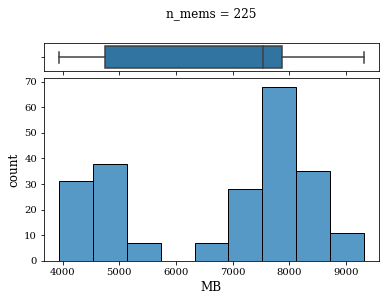

225


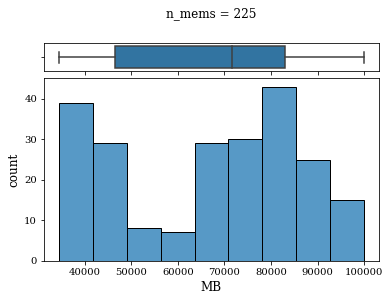

225


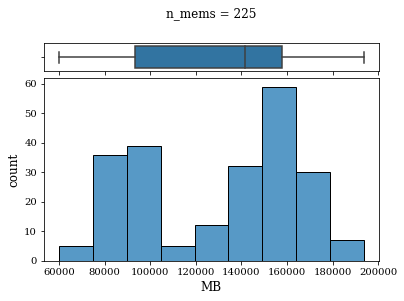

225


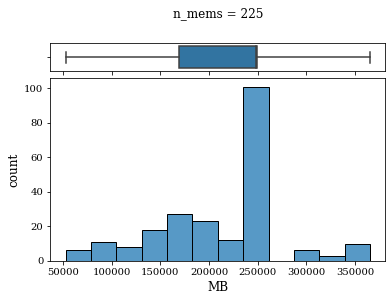

205


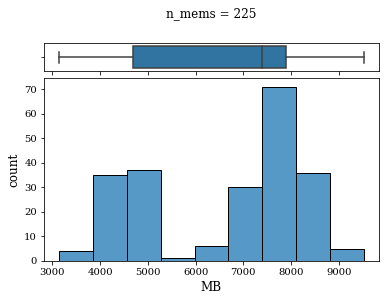

225


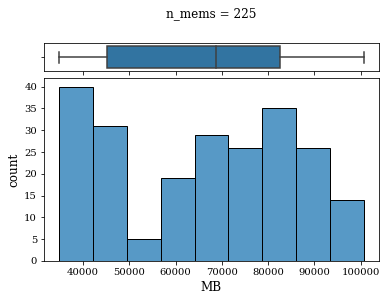

225


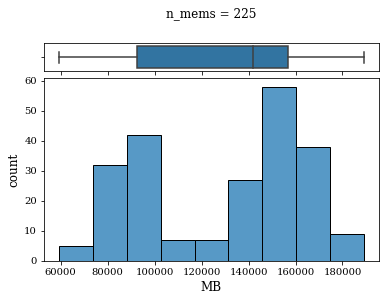

225


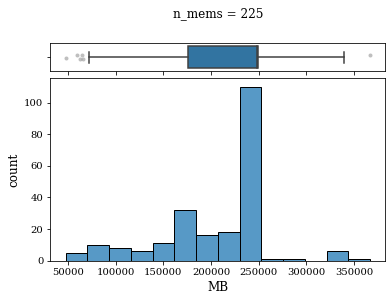

216


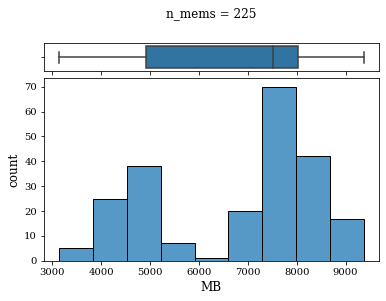

225


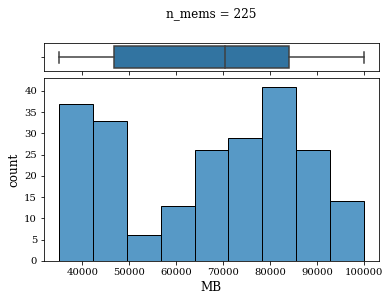

225


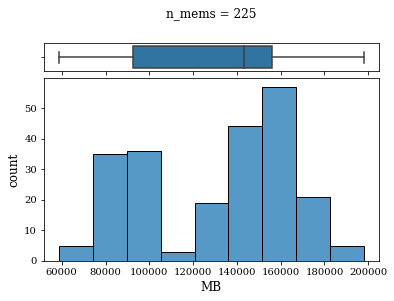

225


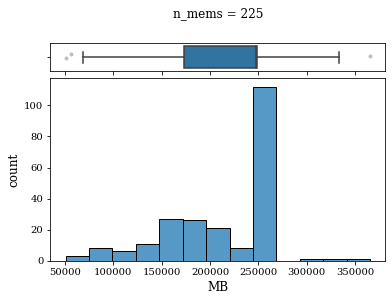

220


In [4]:
for (rep, numloci), repseffs in unwrap_dictionary(seffs):
    repseffs.plot_mems()
    print(sum(repseffs.mems < 250000))

In [5]:
# training jobs that failed all failed because of insufficient memory or time

# note i think timeouts might be nested within failed jobs (and might print for mem and time)

jobs = Squeue().jobs().tolist()

for (rep, numloci), repseffs in unwrap_dictionary(seffs):
    if len(repseffs.failed()) > 0:
        print(ColorText(f'\n{rep} {numloci}').bold())
        for pid, seff in repseffs.failed().items():
            if seff.job in jobs:
                continue
            
            print(pid, seff.info[-1])
            
    if len(repseffs.timeouts()) > 0:
        for pid, seff in repseffs.timeouts().items():
            if seff.job in jobs:
                continue
            
            print(pid, seff.info[-4])


run_20220919_0-225 20000
40889397 Memory Efficiency: 99.56% of 244.14 GB
40889398 Memory Efficiency: 99.58% of 244.14 GB
40889399 Memory Efficiency: 99.58% of 244.14 GB
40889400 Memory Efficiency: 99.59% of 244.14 GB
40889619 Memory Efficiency: 99.59% of 244.14 GB
40889620 Memory Efficiency: 99.58% of 244.14 GB
40889615 Memory Efficiency: 99.48% of 244.14 GB
40889609 Memory Efficiency: 99.56% of 244.14 GB
40889618 Memory Efficiency: 99.48% of 244.14 GB
40889403 Memory Efficiency: 99.60% of 244.14 GB
40889603 Memory Efficiency: 96.73% of 244.14 GB
40889405 Memory Efficiency: 99.60% of 244.14 GB
40889406 Memory Efficiency: 99.48% of 244.14 GB
40889408 Memory Efficiency: 99.06% of 244.14 GB
40889409 Memory Efficiency: 99.52% of 244.14 GB
40889410 Memory Efficiency: 99.60% of 244.14 GB
40889412 Memory Efficiency: 99.60% of 244.14 GB
40889413 Memory Efficiency: 99.42% of 244.14 GB
40889414 Memory Efficiency: 98.66% of 244.14 GB
40889612 Memory Efficiency: 99.54% of 244.14 GB
40889416 Memor


run_20220919_450-675 20000
40889945 Memory Efficiency: 99.56% of 244.14 GB
40890020 Memory Efficiency: 92.41% of 244.14 GB
40889905 Memory Efficiency: 99.60% of 244.14 GB
40889892 Memory Efficiency: 98.23% of 244.14 GB
40889889 Memory Efficiency: 99.59% of 244.14 GB
40889930 Memory Efficiency: 99.59% of 244.14 GB
40890030 Memory Efficiency: 99.60% of 244.14 GB
40889990 Memory Efficiency: 99.59% of 244.14 GB
40889876 Memory Efficiency: 99.61% of 244.14 GB
40890031 Memory Efficiency: 99.60% of 244.14 GB
40889937 Memory Efficiency: 99.59% of 244.14 GB
40889865 Memory Efficiency: 99.50% of 244.14 GB
40889923 Memory Efficiency: 99.60% of 244.14 GB
40889984 Memory Efficiency: 99.58% of 244.14 GB
40889974 Memory Efficiency: 99.60% of 244.14 GB
40889915 Memory Efficiency: 99.60% of 244.14 GB
40889855 Memory Efficiency: 99.59% of 244.14 GB
40889929 Memory Efficiency: 99.56% of 244.14 GB
40889992 Memory Efficiency: 99.60% of 244.14 GB
40889973 Memory Efficiency: 99.59% of 244.14 GB
40889995 Mem

In [ ]:
params = rt.mvp.read_params_file()

In [21]:
# what type of simulation landscapes are failing?
failed_seeds = []
for (rep, numloci), repseffs in unwrap_dictionary(seffs):
    if len(repseffs.failed()) > 0:
        failed_seeds.extend(
            [op.basename(sh).split("_")[0] for sh in repseffs.failed().shfiles]
        )

pd.Series(failed_seeds).map(params.landscape).value_counts()

Est-Clines    160
SS-Clines     157
dtype: int64

<a id='update'></a>

# update mem and time requests for failed jobs

[top](#home)

In [23]:
# update mem and time requests of submitted jobs
for (rep, numloci), repseffs in unwrap_dictionary(seffs):
    if len(repseffs.failed()) > 0:
        print(ColorText(f'\n{rep} {numloci}').bold())
        
        for sh in repseffs.failed().shfiles:
            text = read(sh, lines=True)
            assert 'time=' in text[2]
            text[2] = '#SBATCH --time=5-00:00:00'
            
            assert 'mem=' in text[3]
            text[3] = '#SBATCH --mem=400000M'
            
            assert 'partition' in text[4]
            text[4] = '#SBATCH --partition=long'
            
            with open(sh, 'w') as o:
                o.write("\n".join(text))
        
        sbatch(repseffs.failed().shfiles)

text


run_20220919_0-225 20000


sbatching: 100%|███████████████| 98/98 [00:14<00:00,  6.69it/s]



run_20220919_225-450 20000


sbatching: 100%|███████████████| 107/107 [00:16<00:00,  6.38it/s]



run_20220919_450-675 20000


sbatching: 100%|███████████████| 112/112 [00:19<00:00,  5.85it/s]


['#!/bin/bash',
 '#SBATCH --job-name=1231762_GF_training_ind_all',
 '#SBATCH --time=5-00:00:00',
 '#SBATCH --mem=400000M',
 '#SBATCH --partition=long',
 '#SBATCH --output=1231762_GF_training_ind_all_%j.out',
 '#SBATCH --mail-user=dummy_email@gmail.com',
 '#SBATCH --mail-type=FAIL',
 '',
 'source $HOME/.bashrc  # assumed that conda init is within .bashrc',
 'conda deactivate',
 'conda activate r35',
 '',
 'cd /work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/20000/gradient_forests/training/training_files',
 '',
 '/home/b.lind/anaconda3/envs/r35/lib/R/bin/Rscript \\',
 '/home/b.lind/code/MVP-offsets/01_src/MVP_gf_training_script.R \\',
 '1231762_Rout_Gmat_sample_maf-gt-p01_GFready_ind_all.txt \\',
 '1231762_envfile_GFready_ind.txt \\',
 '1231762_rangefile_GFready_ind.txt \\',
 '1231762_GF_training_ind_all \\',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/20000/gradient_forests/training/training_outfiles',
 '',
 '']

<a id='fit'></a>
### look at status and resource use of submitted fitting jobs

[top](#home)

In [6]:
# !!! failed states are expected because of KeyError (after performance is calculated)
fitseffs = defaultdict(dict)
for rep, dirs in ind_dirs.items():
    for d in dirs:
        num_loci = op.basename(d)
        
        fitting_dir = f'{d}/gradient_forests/fitting/fitting_shfiles'

        outs = fs(fitting_dir, endswith='.out')
        
        if len(outs) == 0:
            print(ColorText(f'{rep} {num_loci} 0').fail().bold())
            continue
            
        fitseffs[rep][num_loci] = Seffs.parallel(lview, outs=outs).most_recent()
        
        print(
            rep, num_loci, len(fitseffs[rep][op.basename(d)]), f'expected = %s' % len(seffs[rep][num_loci].completed()), '\n',
            fitseffs[rep][num_loci].states.counter(), '\n\n'
        )


Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 121.28it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=226 luni=225
  warnings.warn(text)


run_20220919_0-225 00500 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 228 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 228/228 [00:01<00:00, 132.99it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=228 luni=225
  warnings.warn(text)


run_20220919_0-225 05000 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 230 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 230/230 [00:02<00:00, 111.95it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=230 luni=225
  warnings.warn(text)


run_20220919_0-225 10000 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 227 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 227/227 [00:01<00:00, 132.88it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=227 luni=224
  warnings.warn(text)


run_20220919_0-225 20000 224 expected = 121 
 Counter({'State: FAILED (exit code 1)': 224}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 115.92it/s]


run_20220919_225-450 00500 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 234 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 234/234 [00:01<00:00, 132.29it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=234 luni=225
  warnings.warn(text)


run_20220919_225-450 05000 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 132.81it/s]


run_20220919_225-450 10000 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 224 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 224/224 [00:01<00:00, 120.80it/s]


run_20220919_225-450 20000 224 expected = 113 
 Counter({'State: FAILED (exit code 1)': 224}) 



Watching 226 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 226/226 [00:01<00:00, 133.46it/s]


run_20220919_450-675 00500 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 245 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 245/245 [00:01<00:00, 132.97it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=245 luni=225
  warnings.warn(text)


run_20220919_450-675 05000 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 232 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 232/232 [00:01<00:00, 132.78it/s]
/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=232 luni=225
  warnings.warn(text)


run_20220919_450-675 10000 225 expected = 225 
 Counter({'State: FAILED (exit code 1)': 225}) 



Watching 225 parallel Seffs jobs ...


retrieving seffs: 100%|███████████████| 225/225 [00:01<00:00, 126.68it/s]

run_20220919_450-675 20000 224 expected = 109 
 Counter({'State: FAILED (exit code 1)': 224}) 





/home/b.lind/pythonimports/myslurm.py:560: UserWarning: There are multiple shfiles associated with outfiles. len=225 luni=224
  warnings.warn(text)


run_20220919_0-225 00500


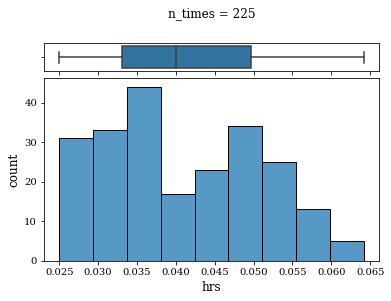

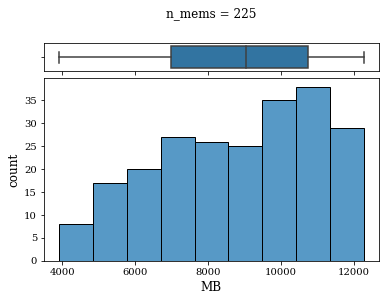

run_20220919_0-225 05000


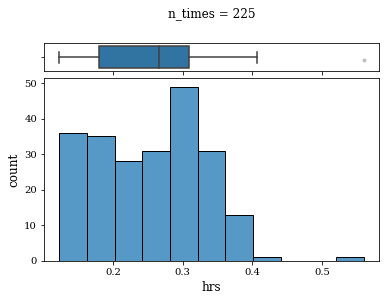

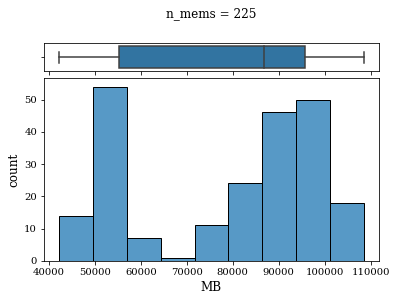

run_20220919_0-225 10000


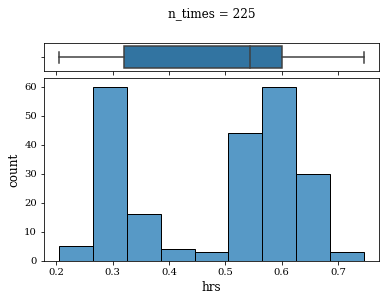

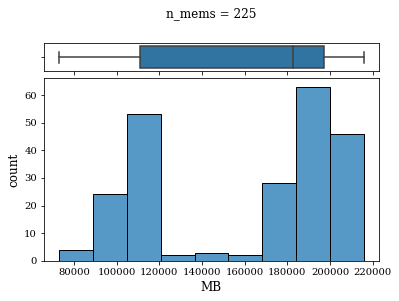

run_20220919_0-225 20000


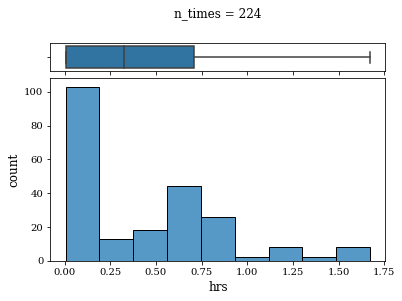

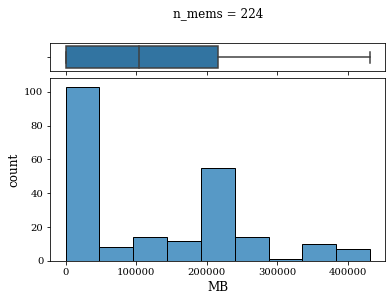

run_20220919_225-450 00500


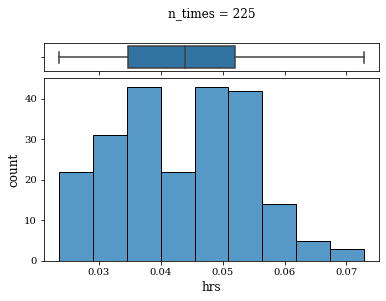

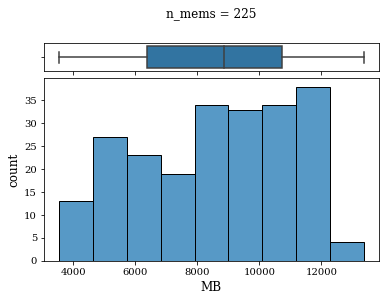

run_20220919_225-450 05000


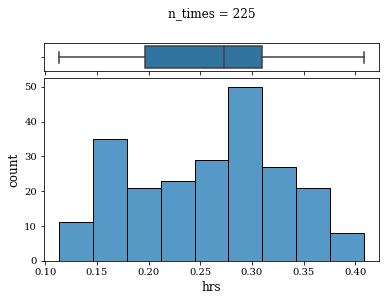

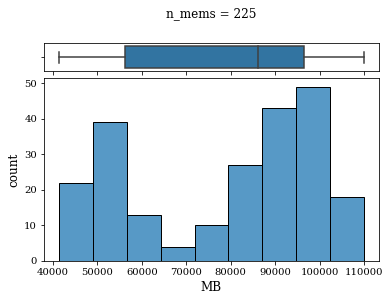

run_20220919_225-450 10000


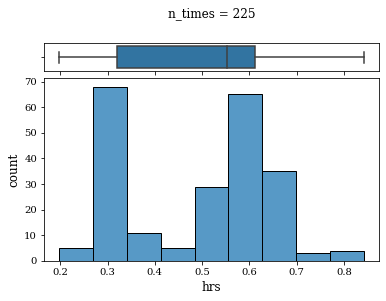

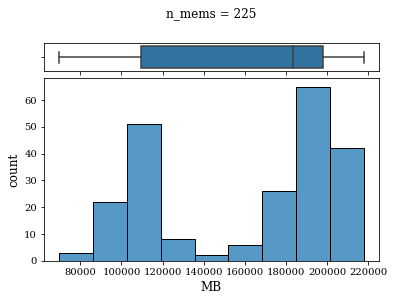

run_20220919_225-450 20000


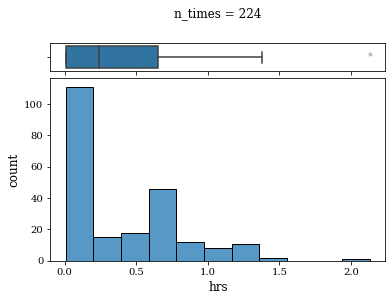

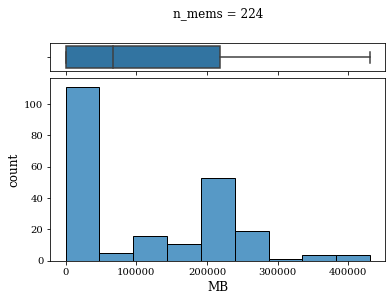

run_20220919_450-675 00500


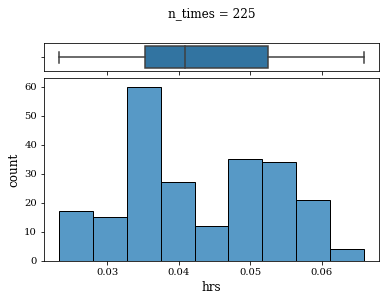

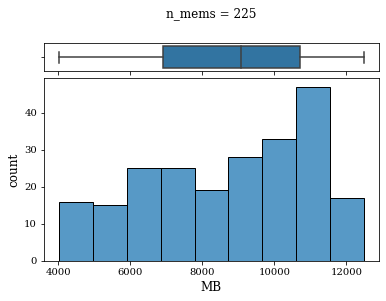

run_20220919_450-675 05000


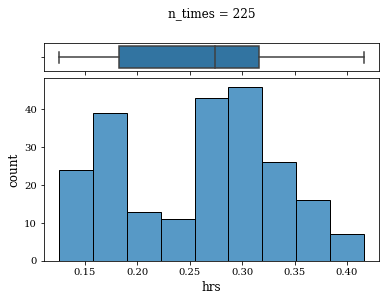

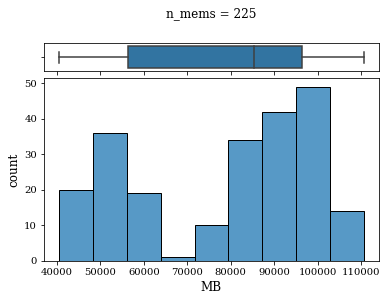

run_20220919_450-675 10000


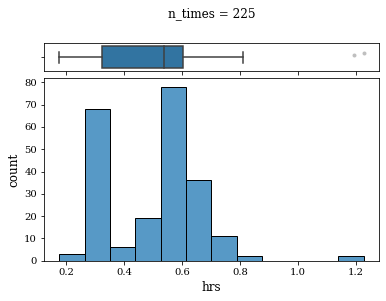

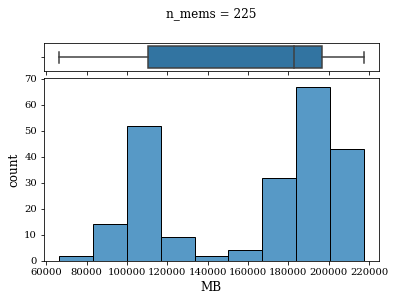

run_20220919_450-675 20000


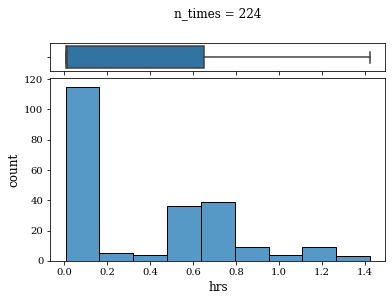

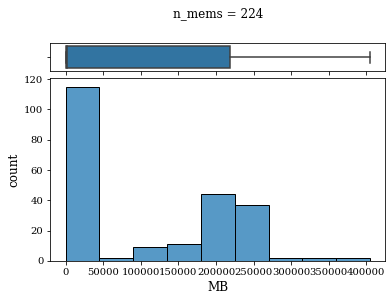

In [12]:
for (rep, num_loci), repseffs in unwrap_dictionary(fitseffs):
    print(rep, num_loci)
    repseffs.plot_times()
    repseffs.plot_mems()

<a id='comp'></a>
# see which datasets did not complete

[top](#home)

In [13]:
# get a list of the 180 2-trait seeds from each 225-seed group of replicates
params = rt.mvp.read_params_file()

rep_seeds = {}
for i in range(3):
    if i == 0:
        rows = range(225)
        rep = 'run_20220919_0-225'
    elif i ==1:
        rows = range(225, 450)
        rep = 'run_20220919_225-450'
    else:
        rows = range(450, 675)
        rep = 'run_20220919_450-675'
        
    df = params.iloc[rows]
    
    assert nrow(df) == 225
    
    df2 = df[df.plevel == '2-trait']
    
    rep_seeds[rep] = df2.seed.astype(str).tolist()

100%|███████████████| 2250/2250 [00:02<00:00, 750.32it/s]


In [14]:
# get groups of replication IDs (seeds) identified
seeds = wrap_defaultdict(list, 2)
shseeds = wrap_defaultdict(dict, 2)
for rep, dirs in ind_dirs.items():
    for d in dirs:
        num_loci = d.split("/")[6]
        
        training_dir = f'{d}/gradient_forests/training/training_shfiles'

        if op.exists(training_dir):
            shfiles = fs(training_dir, endswith='.sh', exclude='watcher')
            assert len(shfiles) == 225

            for sh in shfiles:
                seed = op.basename(sh).split("_")[0]
                if seed in rep_seeds[rep]:
                
                    seeds[rep][num_loci].append(seed)
                    shseeds[rep][num_loci][seed] = sh
        else:
            print(ColorText(training_dir).fail())

luni(seeds)

3

In [15]:
fitting_needed = defaultdict(dict)
training_needed = defaultdict(dict)
for rep, repdirs in ind_dirs.items():
    for repdir in repdirs:
        gf_dir = f'{repdir}/gradient_forests'
        num_loci = repdir.split("/")[6]
        
        training_dir = f'{gf_dir}/training/training_shfiles'
        
        
        if len(fs(training_dir, endswith='.out')) > 0:
            # get needed fitting jobs
            validation_dir = f'{gf_dir}/validation/corrs'
            needed = set(seeds[rep][num_loci])
            
            if op.exists(validation_dir):
                pkls = fs(validation_dir, endswith='.pkl')
                
#                 if len(pkls) > 0:
#                     print(rep, num_loci, len(pkls))

                for pkl in pkls:
                    needed -= set([op.basename(pkl).split("_")[0]])
        
            fitting_needed[rep][num_loci] = needed
            
            # get needed training jobs
            outfile_dir = f'{gf_dir}/training/training_outfiles'
            outfiles = fs(outfile_dir, endswith='predOut.RDS')
            
            needed = set(seeds[rep][num_loci])
            
            for outfile in outfiles:
                seed = op.basename(outfile).split("_")[0]
                needed -= set([seed])
            
            training_needed[rep][num_loci] = needed

In [16]:
# how many training and fitting are needed - the two numbers should be the same
for rep in fitting_needed:
    for num_loci, needs in fitting_needed[rep].items():
        print(rep, num_loci, len(training_needed[rep][num_loci]), len(needs))
        print('\n')

run_20220919_0-225 00500 0 0


run_20220919_0-225 05000 0 0


run_20220919_0-225 10000 0 0


run_20220919_0-225 20000 85 85


run_20220919_225-450 00500 0 0


run_20220919_225-450 05000 0 0


run_20220919_225-450 10000 0 0


run_20220919_225-450 20000 90 90


run_20220919_450-675 00500 0 0


run_20220919_450-675 05000 0 0


run_20220919_450-675 10000 0 0


run_20220919_450-675 20000 94 94




### everything below here was from a previous run of the noteook

saving for notes

In [13]:
# since the trainined and fitting needed are not the same,
    # get seeds of fitting jobs that have completed training jobs
    
truly_needed = []
for (rep, num_loci), needed in unwrap_dictionary(fitting_needed):
    gf_dir = f'/work/lotterhos/brandon/ind_runtimes/{rep}/{num_loci}/gradient_forests'
    
    needed_here = needed - training_needed[rep][num_loci]
    for seed in needed_here:
        sh = f'{gf_dir}/fitting/fitting_shfiles/{seed}_gf_fitting.sh'
        
        text = read(sh, lines=True)
        
        # remove dependency flag
        if '--dependency' in text[6]:
            text.remove(text[6])
            
            with open(sh, 'w') as o:
                o.write('\n'.join(text))
            
        truly_needed.append(sh)
        

len(truly_needed)

2

In [14]:
truly_needed

['/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/20000/gradient_forests/fitting/fitting_shfiles/1231294_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/20000/gradient_forests/fitting/fitting_shfiles/1231172_gf_fitting.sh']

In [20]:
for sh in truly_needed:
    rep, num_loci = sh.split('/')[5:7]
    seed = op.basename(sh).split("_")[0]
    training_file = f'/work/lotterhos/brandon/ind_runtimes/{rep}/{num_loci}/gradient_forests/training/training_outfiles/{seed}_GF_training_ind_all_gradient_forest_training.RDS'
    assert op.exists(training_file), sh
    
sh

'/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/20000/gradient_forests/fitting/fitting_shfiles/1231763_gf_fitting.sh'

In [21]:
sbatch(truly_needed)

sbatching: 100%|███████████████| 9/9 [00:01<00:00,  7.56it/s]


['41087596',
 '41087598',
 '41087600',
 '41087601',
 '41087602',
 '41087603',
 '41087604',
 '41087605',
 '41087606']

In [22]:
Squeue()

🗒️  Queue Summary:

{'lotterhos': {'R': 1},
 'short': {'PD': 9}}

In [23]:
Squeue(partition='short').update(to_partition='long', num_jobs=0.5)

update: 100%|███████████████| 5/5 [00:00<00:00, 14.39it/s]


In [24]:
for rep, repdirs in ind_dirs.items():
    for repdir in repdirs:
        num_loci = repdir.split("/")[6]
        corrdir = f'{repdir}/gradient_forests/validation/corrs'
        
        if op.exists(corrdir):
            pkls = fs(corrdir, endswith='.pkl')
            print(rep, num_loci, len(pkls), 225-len(pkls))
        else:
            print(ColorText(f'{rep=} {num_loci=}').bold())

run_20220919_0-225 00500 225 0
run_20220919_0-225 05000 225 0
run_20220919_0-225 10000 225 0
run_20220919_0-225 20000 120 105
run_20220919_225-450 00500 225 0
run_20220919_225-450 05000 225 0
run_20220919_225-450 10000 225 0
run_20220919_225-450 20000 113 112
run_20220919_450-675 00500 225 0
run_20220919_450-675 05000 222 3
run_20220919_450-675 10000 225 0
run_20220919_450-675 20000 106 119


In [70]:
sh

'/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/20000/gradient_forests/training/training_shfiles/1231260_GF_training_pooled_all.sh'

In [95]:
# submit training jobs
jobs = Squeue().jobs().tolist()

broke = False
training_pids = wrap_defaultdict(dict, 2)  # dict[rep][d][seed]
for (rep, numloci), needs in unwrap_dictionary(training_needed):
    for seed in pbar(needs, desc=f'{rep} {numloci}'):
        sh = shseeds[rep][numloci][seed].replace('fitting', 'training')\
                                    .replace('.sh', '_ind_all.sh')\
                                    .replace('gf', 'GF')
        
        job = op.basename(sh).rstrip('.sh')
        if job not in jobs:
            training_pids[rep][numloci][seed] = sbatch(sh, progress_bar=False)[0]

run_20220919_0-225 00500: |               | 0/0 [00:00<?, ?it/s]
run_20220919_0-225 05000: |               | 0/0 [00:00<?, ?it/s]
run_20220919_0-225 10000: |               | 0/0 [00:00<?, ?it/s]
run_20220919_0-225 20000: 100%|███████████████| 120/120 [00:03<00:00, 32.80it/s]
run_20220919_225-450 00500: |               | 0/0 [00:00<?, ?it/s]
run_20220919_225-450 05000: |               | 0/0 [00:00<?, ?it/s]
run_20220919_225-450 10000: |               | 0/0 [00:00<?, ?it/s]
run_20220919_225-450 20000: 100%|███████████████| 217/217 [00:44<00:00,  4.93it/s]
run_20220919_450-675 00500: |               | 0/0 [00:00<?, ?it/s]
run_20220919_450-675 05000: |               | 0/0 [00:00<?, ?it/s]
run_20220919_450-675 10000: |               | 0/0 [00:00<?, ?it/s]
run_20220919_450-675 20000: 100%|███████████████| 217/217 [00:47<00:00,  4.57it/s]


In [19]:
# submit fitting jobs
jobs = Squeue().jobs().tolist()
for (rep, d), needs in unwrap_dictionary(fitting_needed):
    for seed in pbar(needs, desc=f'{rep} {d}'):
        fitsh = shseeds[rep][d][seed]
        
        job = op.basename(fitsh).rstrip('.sh')
        
        if job in jobs:
            continue        
        
        text = read(fitsh, lines=True)
        
        # edit dependency if needed
        if seed in keys(training_pids[rep][d]):
            pid = training_pids[rep][d][seed]

            deptext = f'#SBATCH --dependency=afterok:{pid}'
            
            if 'dependency' in text[6]:
                text[6] = deptext
            else:
                text.insert(6, deptext)

        else:
            if 'dependency' in text[6]:
                text.remove(text[6])
                
        with open(fitsh, 'w') as o:
            o.write('\n'.join(text))

        
        sbatch(fitsh, progress_bar=False)

run_20220919_0-225 00500: |               | 0/0 [00:00<?, ?it/s]
run_20220919_0-225 10000: 100%|███████████████| 4/4 [00:00<00:00,  6.71it/s]
run_20220919_225-450 00500: |               | 0/0 [00:00<?, ?it/s]
run_20220919_225-450 05000:   0%|               | 0/2 [00:00<?, ?it/s]sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_225-450 05000:  50%|███████▌       | 1

!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_225-450 05000: 100%|███████████████| 2/2 [00:02<00:00,  1.23s/it]


!!!REACHED FAILCOUNT LIMIT OF 10!!!


run_20220919_225-450 10000: |               | 0/0 [00:00<?, ?it/s]
run_20220919_450-675 00500: |               | 0/0 [00:00<?, ?it/s]
run_20220919_450-675 05000:   0%|               | 0/10 [00:00<?, ?it/s]sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  10%|█▌             | 1/10 [00:01<00:11,  1.23s/it]sbatch: error: Batch job submission failed: Jo

!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  20%|███            | 2/10 [00:02<00:08,  1.00s/it]sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem


!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  30%|████▌          | 3/10 [00:03<00:07,  1.09s/it]sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem


!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  40%|██████         | 4/10 [00:04<00:06,  1.01s/it]sbatch: error: Batch job submission failed: Job dependency problem


!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  50%|███████▌       | 5/10 [00:05<00:05,  1.03s/it]sbatch: error: Batch job submission failed: Job dependency problem


!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  60%|█████████      | 6/10 [00:06<00:04,  1.11s/it]

!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  70%|██████████▌    | 7/10 [00:07<00:03,  1.14s/it]

!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  80%|████████████   | 8/10 [00:08<00:02,  1.12s/it]sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem


!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000:  90%|█████████████▌ | 9/10 [00:09<00:01,  1.12s/it]sbatch: error: Batch job submission failed: Job dependency problem


!!!REACHED FAILCOUNT LIMIT OF 10!!!


sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
sbatch: error: Batch job submission failed: Job dependency problem
run_20220919_450-675 05000: 100%|███████████████| 10/10 [00:11<00:00,  1.12s/it]


!!!REACHED FAILCOUNT LIMIT OF 10!!!


run_20220919_450-675 10000: 100%|███████████████| 10/10 [00:01<00:00,  7.34it/s]


In [97]:
Squeue(grepping='fit')

🗒️  Queue Summary:

{'long': {'PD': 209, 'R': 5},
 'short': {'PD': 219, 'R': 6}}

In [99]:
Squeue(grepping='train', partition='long').update(to_partition='short', num_jobs=0.5)

update: 100%|███████████████| 277/277 [00:18<00:00, 14.71it/s]


In [101]:
Squeue(grepping='train')

🗒️  Queue Summary:

{'long': {'PD': 277},
 'short': {'PD': 277, 'R': 3}}

In [102]:
Squeue(grepping='Held').release()

100%|███████████████| 106/106 [00:05<00:00, 18.43it/s]


In [27]:
Squeue()

🗒️  Queue Summary:

{'long': {'PD': 5},
 'lotterhos': {'R': 1},
 'short': {'PD': 4}}

In [26]:
truly_needed

['/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/20000/gradient_forests/fitting/fitting_shfiles/1231288_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/20000/gradient_forests/fitting/fitting_shfiles/1231172_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_0-225/20000/gradient_forests/fitting/fitting_shfiles/1231294_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/05000/gradient_forests/fitting/fitting_shfiles/1231665_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/05000/gradient_forests/fitting/fitting_shfiles/1231650_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/05000/gradient_forests/fitting/fitting_shfiles/1231620_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/20000/gradient_forests/fitting/fitting_shfiles/1231743_gf_fitting.sh',
 '/work/lotterhos/brandon/ind_runtimes/run_20220919_450-675/20000/gradient_forests/fittin